In [1]:
from lstm_chem.model import LSTMChem
from lstm_chem.dataloader import DataLoader
from lstm_chem.trainer import LSTMChemTrainer
from lstm_chem.generator import LSTMChemGenerator

In [2]:
from config import Config
from rdkit import RDLogger, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
RDLogger.DisableLog('rdApp.*')
import pandas as pd

In [3]:
config = Config()
modeler = LSTMChem(config, session='generate')
generator = LSTMChemGenerator(modeler)
print(config)

Loading model architecture from ./code_exp/LSTM_Chem/model_arch.json ...
Loading model checkpoint from ./code_exp/LSTM_Chem/checkpoints/LSTM_Chem-baseline-model-full.hdf5 ...
Loaded the Model.


In [4]:
sample_number = 100
sampled_smiles = generator.sample(num=sample_number)

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


In [5]:
valid_mols = []
for smi in sampled_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        valid_mols.append(mol)

In [6]:
print('Validity: ', f'{len(valid_mols) / sample_number:.2%}')

valid_smiles = [Chem.MolToSmiles(mol) for mol in valid_mols]
# high uniqueness
print('Uniqueness: ', f'{len(set(valid_smiles)) / len(valid_smiles):.2%}')

Validity:95.00%
Uniqueness:100.00%


In [16]:
training_data = pd.read_csv('./dataset_cleaned.smi', header=None)
training_set = list(set(training_data[0]))

In [17]:
original = []
for smile in valid_smiles:
    if not smile in training_set:
        original.append(smile)
print('Originality: ', f'{len(set(original)) / len(set(valid_smiles)):.2%}')

Originality:100.00%


In [18]:
with open('./generations0.smi', 'w') as f:
    for item in valid_smiles:
        f.write("%s\n" % item)

In [19]:
from rdkit.Chem import PandasTools

In [20]:
valid_smile_data = pd.read_csv("./generations0.smi",header=None)

In [21]:
valid_smile_data.columns = ['smiles']

In [22]:
PandasTools.AddMoleculeColumnToFrame(valid_smile_data,'smiles')

In [23]:
valid_smile_data.to_csv("gen_95_valid_molecules.csv",index=False)

,smiles,ROMol
20,CCc1ccc(NC(=O)c2ccc(-c3ccccc3)cc2)cc1,
24,CCC(C)(CO)NC(=O)Nc1ccc(C#N)cc1,
80,COc1cc(CCC(=O)NC2CCN(C3CCCC3)CC2)cc(OC)c1OC,
45,COc1ccc(-c2nc(Nc3ccc4c(c3)OCO4)c(C)o2)cc1,
4,Cn1ccnc1-c1cnnc(NCCc2cccc(O)c2)c1,
63,CCCc1ccc(CNC(=O)Cn2nc(C)n3cccc3c2=O)cc1,
79,CC(C)(C)OC(=O)NCCNC(=O)NCCCNC(=O)C1CCCCN1Cc1cc...,
92,COC(=O)c1cccc(OCc2nc(-c3ccccn3)no2)c1,
41,Cc1cc(C)c(-c2nc3ccccc3c(=O)[nH]2)cc1C,
75,CC(C)(C)CC(=O)Nc1ccc(C#N)cc1[N+](=O)[O-],

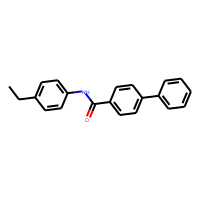
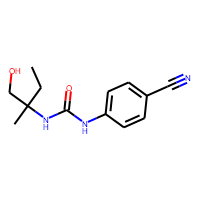
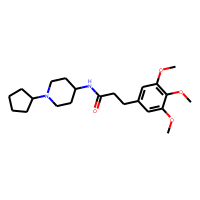
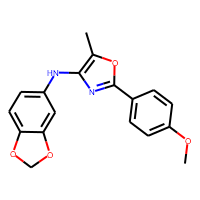
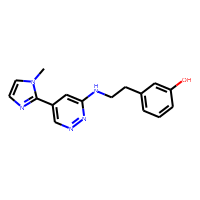
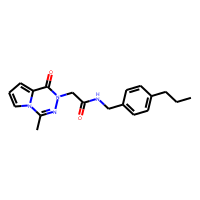
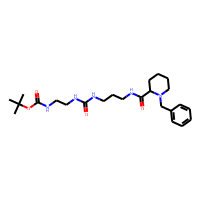
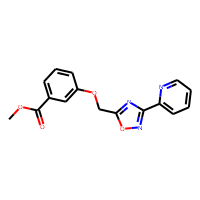
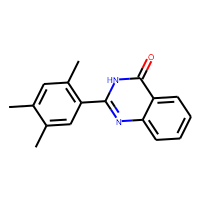
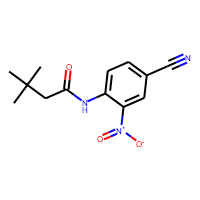

In [24]:
valid_smile_data.sample(10)